In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# DIR=r'D:\Python37\Projects\Foliar diseases in apple trees\images\Original Dataset'
DIR=r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/images'
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/images'):
    count += len(files)
print('file count:', count)

file count: 3648


In [4]:
train=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/train.csv")
test=pd.read_csv(r"/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/test.csv")

In [5]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [6]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


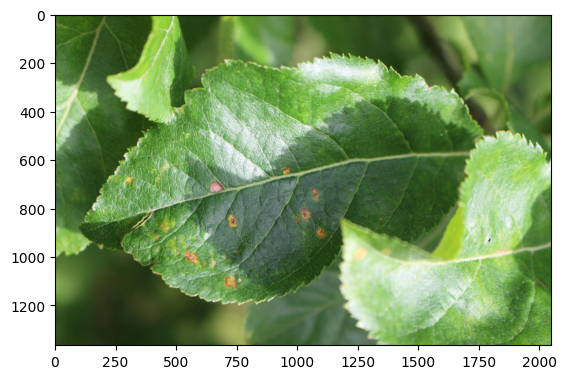

In [7]:
image1=Image.open(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/images/Test_1.jpg')
plt.imshow(image1)
plt.show()

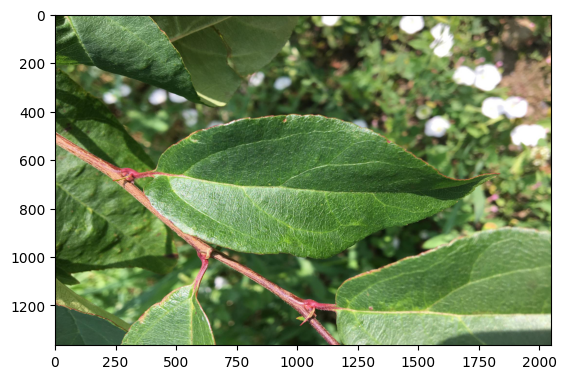

In [8]:
image1=Image.open(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_healthy/Train_646.jpg')
plt.imshow(image1)
plt.show()

In [10]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_healthy'):
    count += len(files)
print('file count:', count)

file count: 516


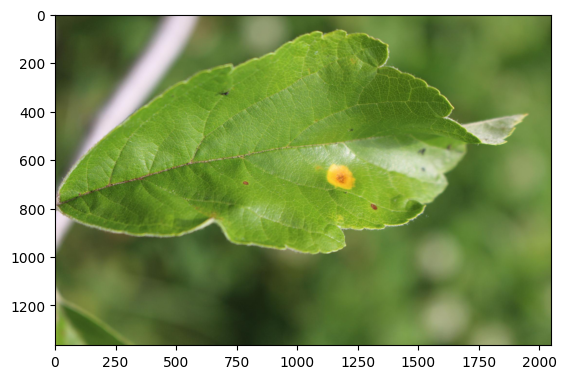

In [11]:
image1=Image.open(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_rust/Train_403.jpg')
plt.imshow(image1)
plt.show()

In [12]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_rust'):
    count += len(files)
print('file count:', count)

file count: 622


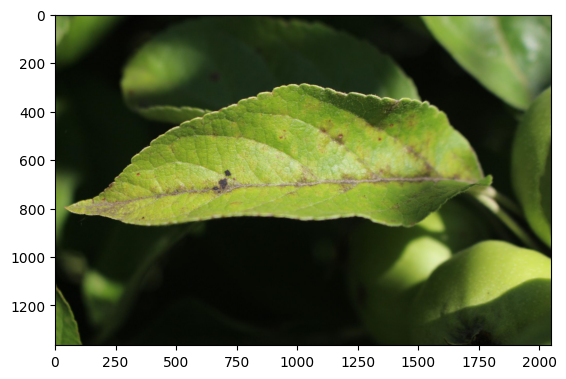

In [13]:
image1=Image.open(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_scab/Train_29.jpg')
plt.imshow(image1)
plt.show()

In [14]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_scab'):
    count += len(files)
print('file count:', count)

file count: 592


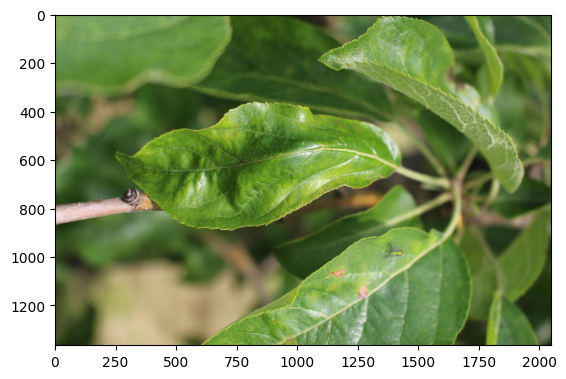

In [15]:
image1=Image.open(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_multiple/Train_180.jpg')
plt.imshow(image1)
plt.show()

In [16]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_images/apple/apple_multiple'):
    count += len(files)
print('file count:', count)

file count: 91


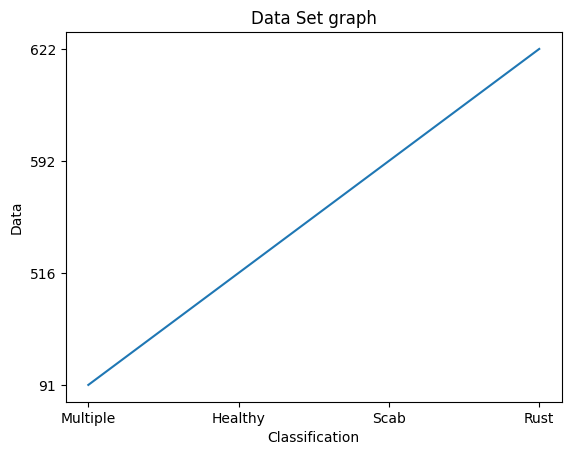

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
plt.style.use('default')
a = ['Multiple','Healthy','Scab','Rust']
b=['91','516','592','622']
plt.plot(a,b)
plt.ylabel("Data")
plt.xlabel("Classification")
plt.title("Data Set graph")
plt.show()
plt.savefig('dataset graph1',dpi=400)

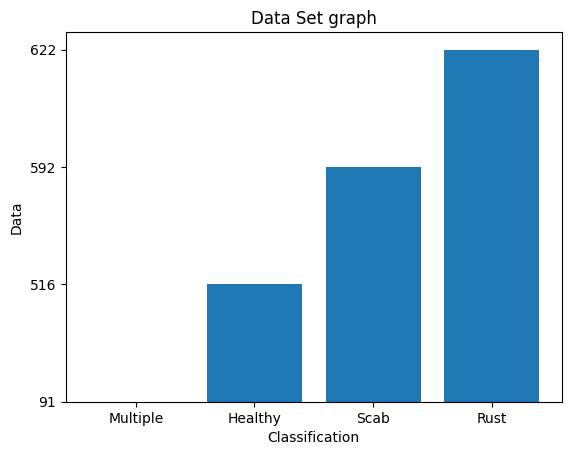

<Figure size 640x480 with 0 Axes>

In [19]:
plt.bar(a,b)
plt.ylabel("Data")
plt.xlabel("Classification")
plt.title("Data Set graph")
plt.show()
plt.savefig('ds11',dpi=400)

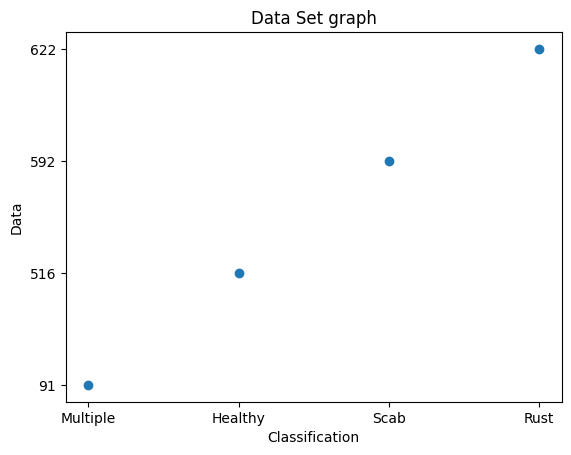

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(a,b)
plt.ylabel("Data")
plt.xlabel("Classification")
plt.title("Data Set graph")
plt.show()
plt.savefig('ds plot1',dpi=400)

## Prepare the Training Data


In [21]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [22]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [23]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [24]:
DIR

'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/images'

In [25]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [26]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [27]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/Apple_Leaf_Disease/plant_img/images'):
    count += len(files)
print('file count:', count)

file count: 3648


In [28]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)

        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train/healthy')

            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train/multiple_disease')

            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train/rust')

            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train/scab')

        elif search("Test",img):
            shutil.copy(path,r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/test')


In [29]:
train_dir=create_train_data()

100%|██████████| 3648/3648 [19:57<00:00,  3.05it/s] 


## Data Preprocessing

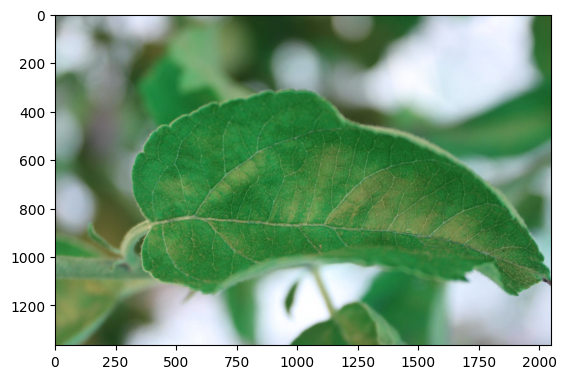

In [30]:
Train_DIR=r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

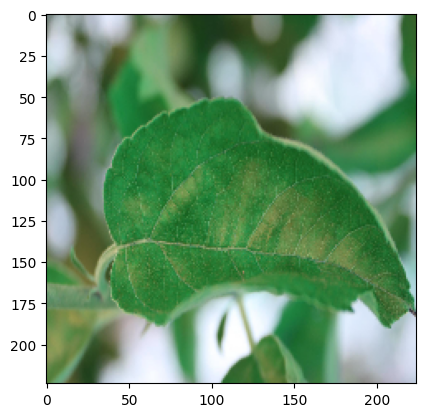

In [31]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

## Model Prepration

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy

In [33]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [34]:
class_names = train_datagen.class_indices
print(class_names)

{'healthy': 0, 'multiple_disease': 1, 'rust': 2, 'scab': 3}


In [35]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [36]:
checkpoint=ModelCheckpoint(r'/content/drive/MyDrive/Apple_Trees/models/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [37]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks)

<ipython-input-37-1051a1669343>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2698 - accuracy: 0.3128
Epoch 1: val_loss improved from inf to 1.25061, saving model to /content/drive/MyDrive/Apple_Trees/models/apple2.h5
91/91 [==============================] - 116s 1s/step - loss: 1.2698 - accuracy: 0.3128 - val_loss: 1.2506 - val_accuracy: 0.3409
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2507 - accuracy: 0.3232
Epoch 2: val_loss improved from 1.25061 to 1.24022, saving model to /content/drive/MyDrive/Apple_Trees/models/apple2.h5
91/91 [==============================] - 92s 1s/step - loss: 1.2507 - accuracy: 0.3232 - val_loss: 1.2402 - val_accuracy: 0.3438
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.1663 - accuracy: 0.4750
Epoch 3: val_loss improved from 1.24022 to 0.92164, saving model to /content/drive/MyDrive/Apple_Trees/models/apple2.h5
91/91 [==============================] - 95s 1s/step - loss: 1.1663 - accuracy: 0.4750 - val_loss: 0.92

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=model_history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=model_history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=model_history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=model_history.history['accuracy'], name="val accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy curve of Sequencial model for Apple Leaf Disease Detection(ALDD) "
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()


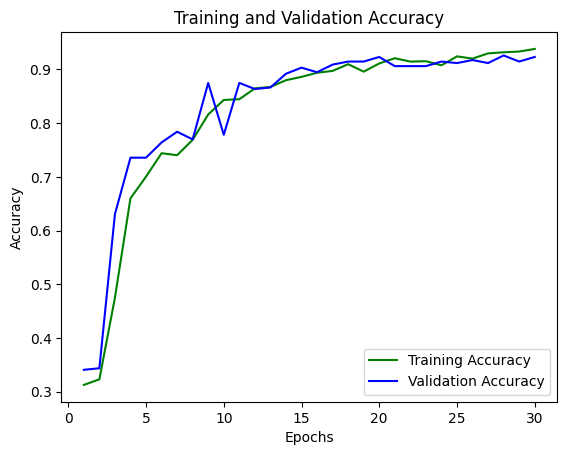

<Figure size 640x480 with 0 Axes>

In [43]:
plt.style.use('default')
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('curve11',dpi=400)


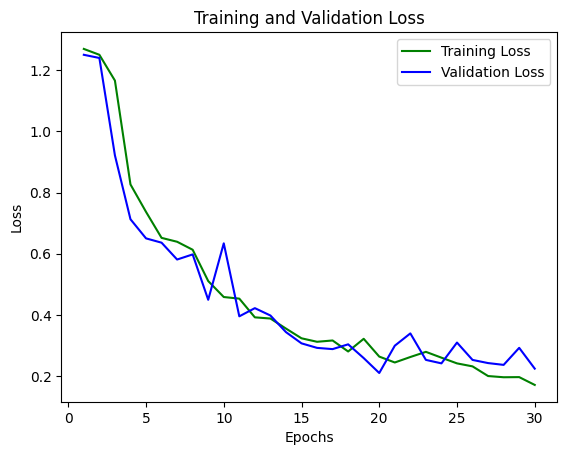

In [44]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

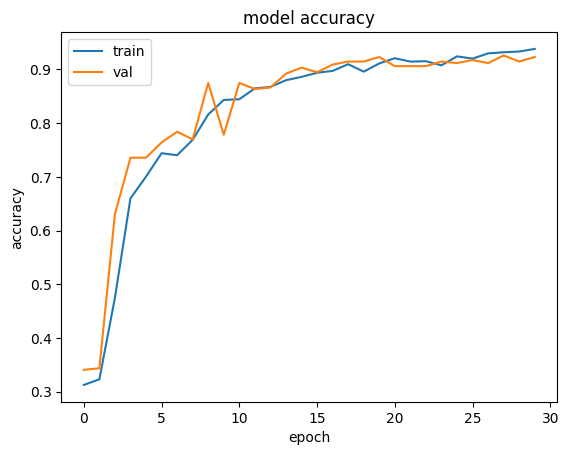

In [45]:
import keras
from matplotlib import pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

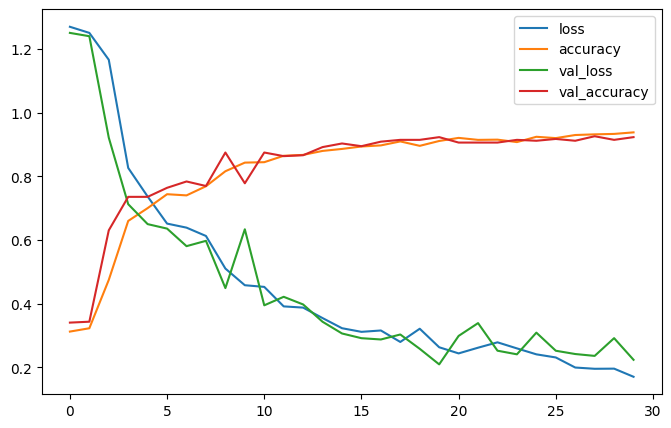

<Figure size 640x480 with 0 Axes>

In [46]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('acc loss',dpi=400)

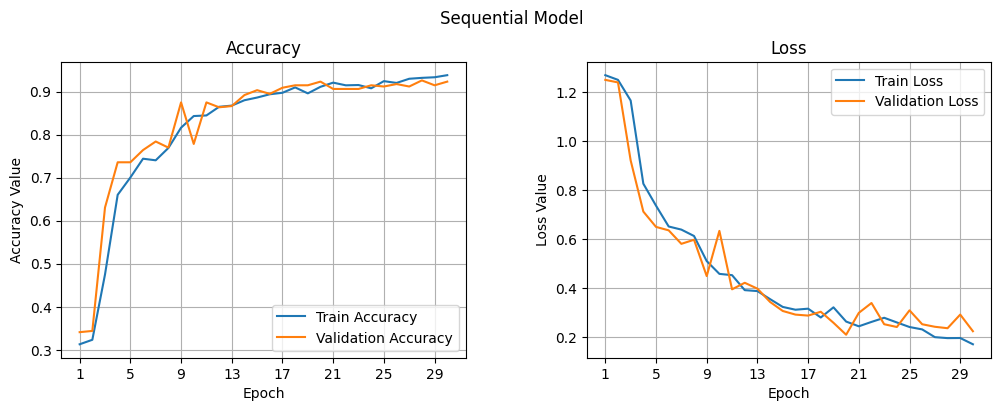

In [50]:
plt.style.use('default')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Sequential Model', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, model_history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, model_history.history['val_accuracy'], label='Validation Accuracy')
ax1.grid()
ax1.set_xticks(np.arange(1, 31, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, model_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, model_history.history['val_loss'], label='Validation Loss')
ax2.grid()
ax2.set_xticks(np.arange(1, 31, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig('curve233',dpi=400)

## Making the Prediction on a Single Image

In [51]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Apple_Trees/models/apple2.h5')

1/1 [==============================] - 1s 581ms/step
2


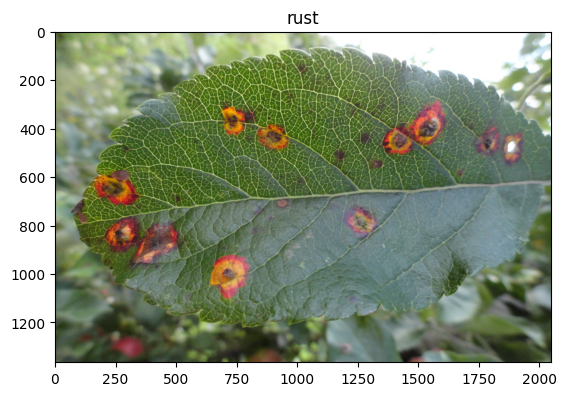

In [53]:
test_image=r'/content/drive/MyDrive/Apple_Leaf_Disease/split_class_img/test/Test_1300.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [54]:
help(model)
from keras import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
model.compile(loss='mean_squared_error', optimizer='sgd',
              metrics=[metrics.mae,
                       metrics.categorical_accuracy])
keras.metrics.categorical_accuracy(test_image, result)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.S

<tf.Tensor: shape=(1, 224, 224), dtype=float32, numpy=
array([[[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [55]:
le =LabelEncoder()
train['image_id']= le.fit_transform(train['image_id'])
train['image_id'].unique()

array([  0,   1, 933, ..., 911, 912, 914])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



<Axes: >

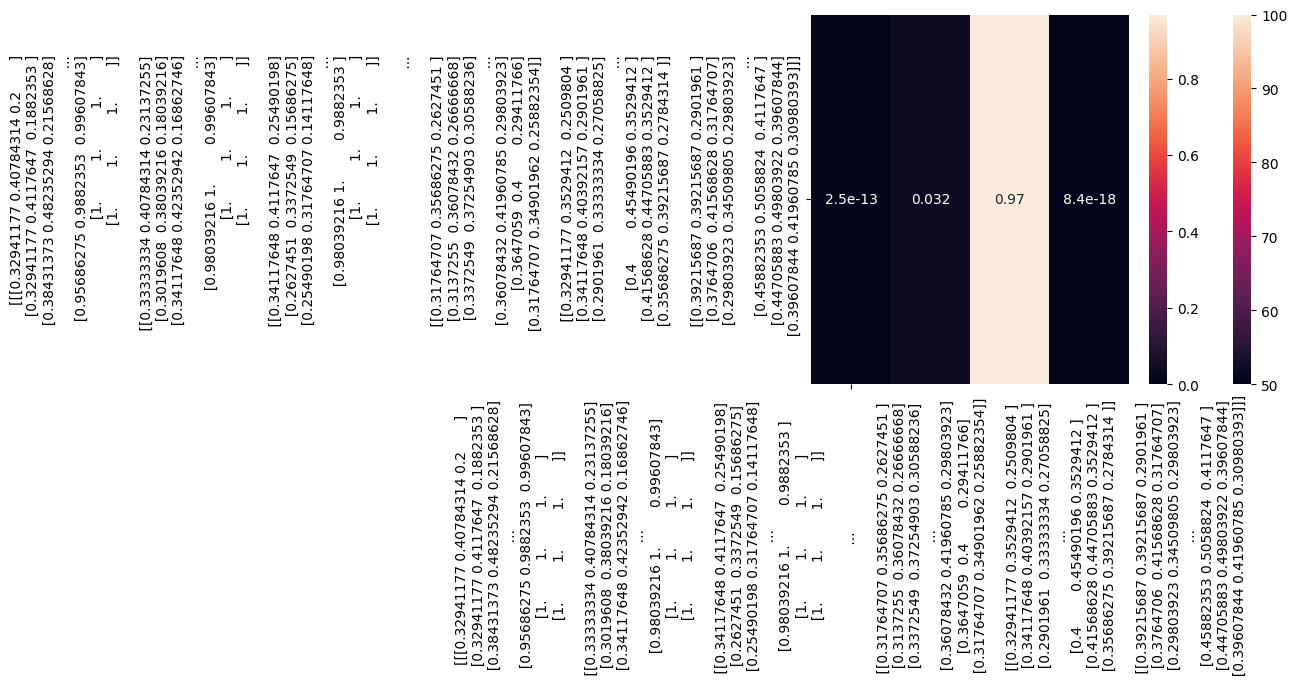

In [56]:
sns.heatmap(train, vmin=50, vmax=100)
sns.heatmap(result, annot=True,xticklabels=test_image, yticklabels=test_image)

In [ ]:
keras.metrics.sparse_categorical_accuracy(test_image, result)
y_pred_class = model.compile(test_image)
y_pred = model.predict(test_image)
y_test_class = np.argmax(test_labels, axis=1)

print(classification_report(y_test_class, y_pred_class))

ValueError: ignored

In [ ]:
model.compile(metrics=[1,224,224,3])


In [ ]:
def recall(test_image, result):
    y_true = K.ones_like(test_image)
    true_positives = K.sum(K.round(K.clip(test_image * result, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(test_image, result):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(test_image * result, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(test_image, result):
    precision = precision_m(test_image, result)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(metrics=['accuracy', f1_score, precision, recall])
test_image.shape
# reduce to 1d array
result = result[:, 0]
test_image = test_image[:, 0]
model.compile('sgd', loss='mse', metrics=[tf.keras.metrics.AUC()])
model.compile('sgd', loss='mse',
               metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

print(recall)

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
train=pd.read_csv(r"G:\capstone\project\Apple_Trees\plant_img\train.csv")
test=pd.read_csv(r"G:\capstone\project\Apple_Trees\plant_img\test.csv")
le =LabelEncoder()
train['image_id']= le.fit_transform(train['image_id'])
train['image_id'].unique()

In [ ]:
le =LabelEncoder()
test['image_id']= le.fit_transform(test['image_id'])
test['image_id'].unique()
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

logmodel = tree.DecisionTreeClassifier()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predictions = logmodel.predict(X_test)
classification_report(y_test,predictions)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
X=pd.read_csv(r"G:\capstone\project\Apple_Trees\plant_img\train.csv")
y=pd.read_csv(r"G:\capstone\project\Apple_Trees\plant_img\test.csv")
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
X['image_id']= le.fit_transform(X['image_id'])
X['image_id'].unique()
y['image_id']= le.fit_transform(y['image_id'])
y['image_id'].unique()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classifier_tree = DecisionTreeClassifier()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, predictions)
Precision = metrics.precision_score(y_test, predictions)
Sensitivity_recall = metrics.recall_score(y_test, predictions)
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
F1_score = metrics.f1_score(y_test, predictions)
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score})